# Análise de dados dos cursos de Graduação e Pós-Graduação da UFRN

Temos como principal objetivo analisar a diferença de gêneros e etnias nos cursos de graduação e pós-graduação da UFRN ao longo dos anos.

Alunos: Carlos Eduardo Alves Sarmento | Jemima Dias Nascimento

# **Introdução**

Para a análise utilizaremos os [dados abertos](https://http://dados.ufrn.br/) da UFRN analisando 5 cursos de graduação de cada centro da UFRN  e 5 programas de pós graduação, sendo eles, respectivamente:

**Centro de Biociências**
* Biologia
* Biomedicina
* Ecologia
* Engenharia de Aquicultura

**Centro de Ciências da Saúde**
* Nutrição
* Enfermagem
* Farmácia
* Medicina
* Odontologia

**Centro de Ciências Exatas e da Terra**
* Estatística
* Física Teórica e Experimental
* Matemática
* Informática e Matemática Aplicada
* Geologia

**Centro de Ciências Humanas, Letras e Artes**
* Artes
* Ciências Sociais
* Filosofia
* Letras
* Psicologia

**Centro de Ciências Sociais Aplicadas**
* Ciências Contábeis
* Economia
* Serviço Social
* Administração Pública e Gestão Social
* Ciência da Informação

**Centro de Tecnologia**
* Arquitetura
* Engenharia Civil
* Engenharia Elétrica
* Engenharia de Produção
* Engenharia Química

**Instituto Metrópole Digital**
* Tecnologia da Informação

**Escola de Ciências e Tecnologia**
* Ciências e Tecnologia

**Programas de Pós-Graduação**
* Mestrado em Engenharia Elétrica e de Computação
* Mestrado em Sistemas e Computação
* Mestrado Profissional em Engenharia de Software
* Mestrado Profissional em Inovação em Tecnologias Educacionais
* Mestrado em Bioinformática
* Doutorado em Engenharia Elétrica e de Computação
* Doutorado em Ciência da Computação
* Doutorado em Bioinformática

Para iniciarmos a nossa análise, iremos ler todos os datasets necessários. Os datasets utilizados datam do período de 2009 a 2019 e contém dados de todos os ingressantes do ano equivalente.

Após a leitura, utilizaremos a função **concat()** para realizar a junção de todos os datasets. Tendo em vista que alguns dados podem estar faltosos na base de dados, utilizaremos a função **dropna()** para limpar quaisquer valores nulos. 

Nossa finalidade nesse primeiro ponto é analisar os dados apenas dos cursos de graduação da UFRN , logo, iremos filtrar do nosso dataset apenas as linhas onde a coluna **"nivel_ensino**" for equivalente a **"graduação"**.
Logo após, iremos criar uma lista com todos os cursos de graduação que citamos acima. Essa lista irá nos auxiliar na hora de percorrer o nosso dataset e filtrar apenas os dados equivalentes aos cursos escolhidos. Para essa filtragem, utilizaremos a função **isin()**.

Observamos que o curso de Aquicultura durante 2009 e 2010 possuía o título de "Aquicultura", no entanto, após 2010 foi mudado para "Engenharia de Aquicultura". Assim, percorremos o nosso dataset e padronizamos para que em todos os casos onde o curso for igual a "Aquicultura", renomear para "Engenharia de Aquicultura".




In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lê os ingressantes
dis_2009 = pd.read_csv("discentes-2009.csv")
dis_2010 = pd.read_csv("discentes-2010.csv")
dis_2011 = pd.read_csv("discentes-2011.csv")
dis_2012 = pd.read_csv("discentes-2012.csv")
dis_2013 = pd.read_csv("discentes-2013.csv")
dis_2014 = pd.read_csv("discentes-2014.csv")
dis_2015 = pd.read_csv("discentes-2015.csv")
dis_2016 = pd.read_csv("discentes-2016.csv")
dis_2017 = pd.read_csv("discentes-2017.csv")
dis_2018 = pd.read_csv("discentes-2018.csv")
dis_2019 = pd.read_csv("discentes-2019.csv")

# Junta todos os discentes em um dataframe só
discentes = pd.concat([dis_2009, dis_2010, dis_2011, dis_2012, dis_2013, dis_2014, dis_2015, dis_2016, dis_2017, dis_2018, dis_2019], axis = 0)

# Apaga linhas com valores nulos
discentes = discentes.dropna()

# Seleciona somente ingressantes da graduação
graduacao = discentes[discentes["nivel_ensino"] == "GRADUAÇÃO"]

# Lista de cursos
cursos = ["CIÊNCIAS BIOLÓGICAS", "BIOMEDICINA", "AQUICULTURA", "ENGENHARIA DE AQUICULTURA", "ECOLOGIA",
         "NUTRIÇÃO", "ENFERMAGEM", "FARMÁCIA", "MEDICINA", "ODONTOLOGIA",
         "ESTATÍSTICA", "FÍSICA", "MATEMÁTICA", "GEOLOGIA", "QUÍMICA",
         "ARTES VISUAIS", "CIÊNCIAS SOCIAIS", "FILOSOFIA", "LETRAS", "PSICOLOGIA",
         "CIÊNCIAS CONTÁBEIS", "DIREITO", "SERVIÇO SOCIAL", "CIÊNCIAS ECONÔMICAS", "ADMINISTRAÇÃO",
         "ARQUITETURA E URBANISMO", "ENGENHARIA CIVIL", "ENGENHARIA ELÉTRICA", "ENGENHARIA DE PRODUÇÃO", "ENGENHARIA QUÍMICA",
         "TECNOLOGIA DA INFORMAÇÃO",
         "CIÊNCIAS E TECNOLOGIA"]

# Selecionar os cursos que queremos
graduacao = graduacao.loc[graduacao["nome_curso"].isin(cursos)]

# Padroniza "Aquicultura" com "Engenharia de Aquicultura"
graduacao.nome_curso = graduacao.nome_curso.replace({"AQUICULTURA":"ENGENHARIA DE AQUICULTURA"})

# Remove o curso "Aquicultura" da nossa lista de cursos, pois a filtragem já foi feita
cursos.remove("AQUICULTURA")

# Exporta arquivo CSV
graduacao.to_csv(r'graduacao.csv')

Nossa análise será dividida da seguinte forma:



*   Análise dos cursos de graduação

> 1.   Análise da diferença de gênero nos cursos de graduação da UFRN
2.   Análise da diferença de raça nos cursos de graduação da UFRN


*   Análise dos cursos de pós-graduação

>1.   Análise da diferença de gênero nos cursos de pós-graduação da UFRN
2.   Análise da diferença de raça nos cursos de pós-graduação da UFRN


# **Graduação**

**1.  Análise da diferença de gênero nos cursos de graduação da UFRN**

---

Nesse primeiro ponto, iremos analisar a diferença de gênero nos cursos de graduação. Utilizaremos, essencialmente, as colunas "sexo" e "ano_ingresso" como base para a nossa análise e faremos uso do gráfico de barras para demonstrar os resultados obtidos.

De início, iremos filtrar do nosso dataset as linhas onde o valor da coluna "sexo" for igual a "N", ou seja, as linhas onde o sexo não foi informado. Logo após, será gerado um gráfico geral com os dados de todos os cursos.



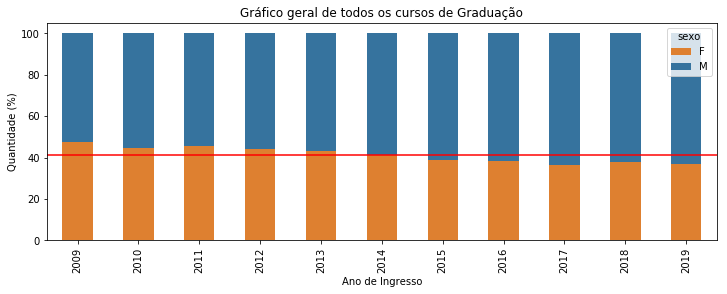

In [10]:
grad = graduacao

# Remove as pessoas que não informaram o sexo
grad = grad[grad.sexo != "N"]

# Paleta de cores fixas
palette = {"M":"C0", "F":"C1"}

# Gráfico geral por porcentagem
grad_plot = grad.groupby(["sexo", "ano_ingresso"]).size().reset_index().pivot(columns="sexo", index="ano_ingresso", values=0)
grad_plot["T"] = grad_plot["M"] + grad_plot["F"]
grad_plot["F"] = grad_plot["F"] / grad_plot["T"] * 100
grad_plot["M"] = grad_plot["M"] / grad_plot["T"] * 100
grad_plot.pop("T")
ax = grad_plot.plot.bar(stacked=True, figsize=(12,4), color=[(0.87, 0.5, 0.19, 1),(0.21,0.45,0.62,1)])
ax.set_xlabel("Ano de Ingresso")
ax.set_ylabel("Quantidade (%)")
ax.set_title("Gráfico geral de todos os cursos de Graduação")
ax.axhline(grad_plot["F"].mean(), color="red")

plt.show()

A linha vermelha no gráfico acima nos mostra a média de pessoas do sexo feminino. Podemos perceber que no aspecto geral dos cursos de graduação, existe uma certa igualdade entre os sexos, mas há uma leve desvantagem para as mulheres. Em 2009, 47% dos ingressantes eram mulheres, mas esse número foi caindo ao longo dos anos até que, em 2019, apenas 37% dos ingressantes eram mulheres. Uma queda de 10% ao longo dos anos. Uma média de 1% a menos por ano.


Agora, iremos gerar um gráfico para cada curso de gradução. Ao todo serão 31 gráficos.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


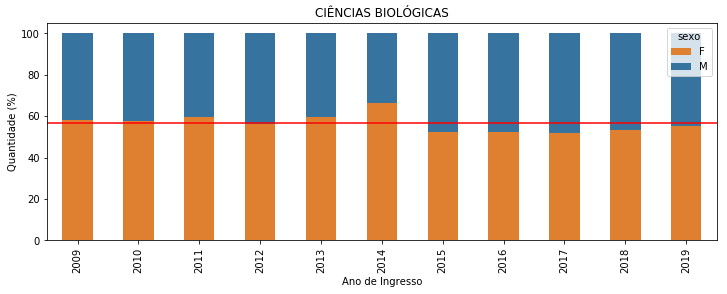

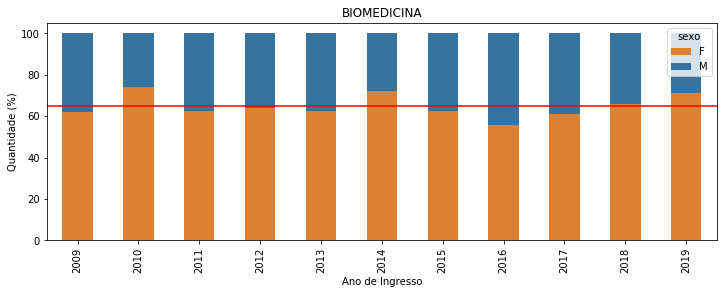

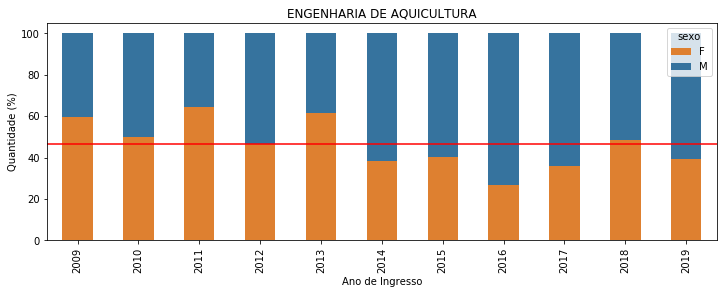

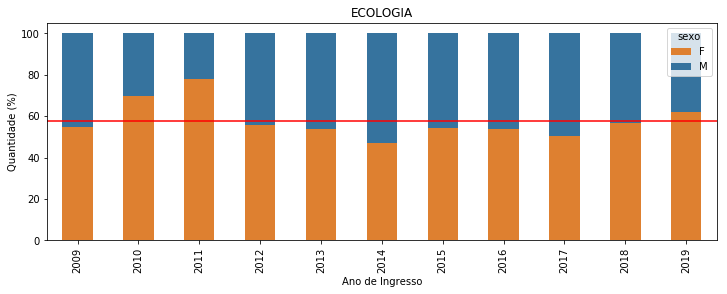

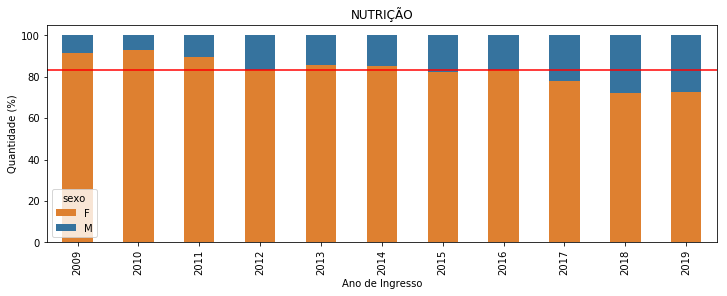

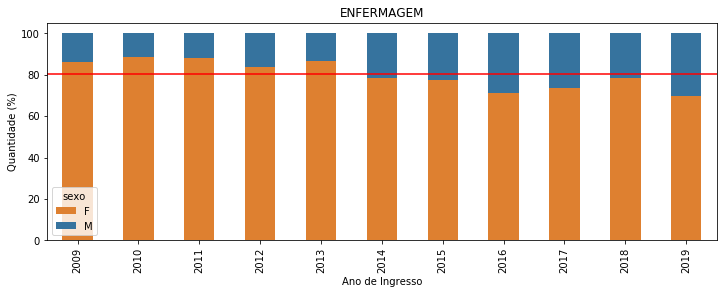

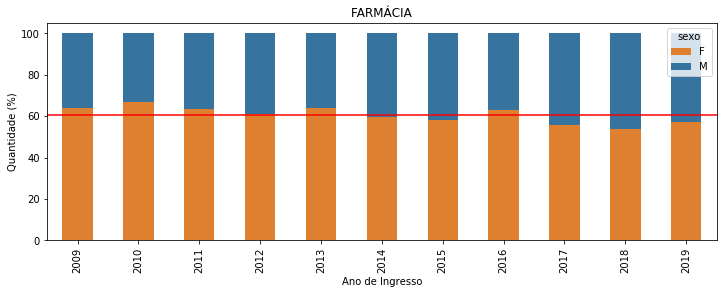

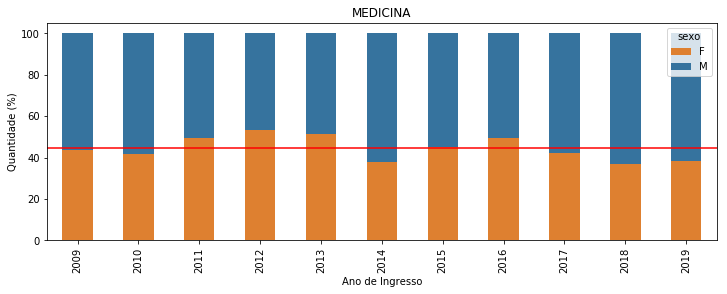

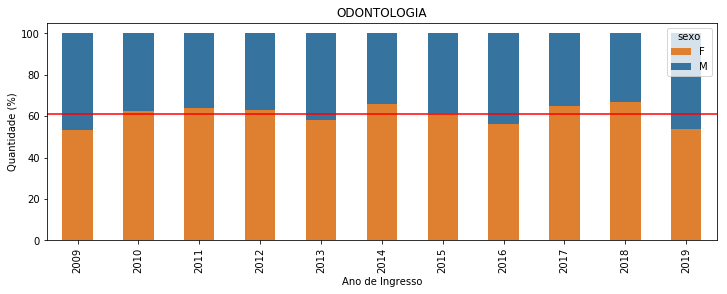

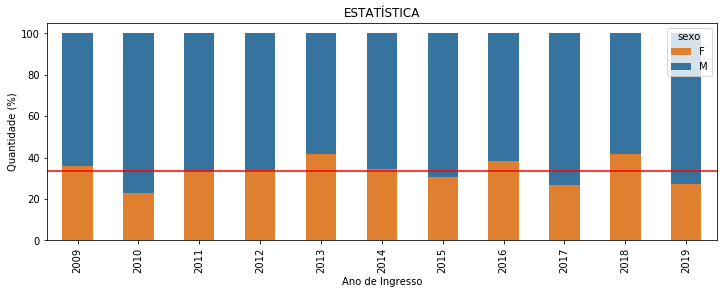

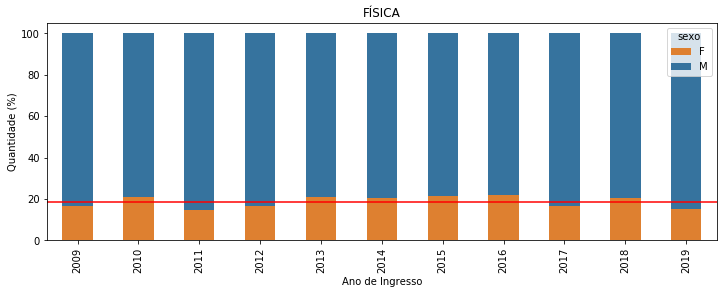

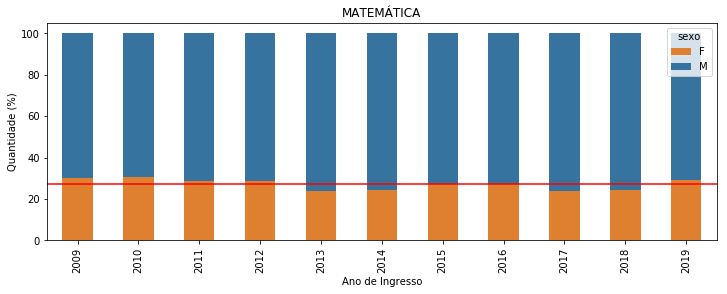

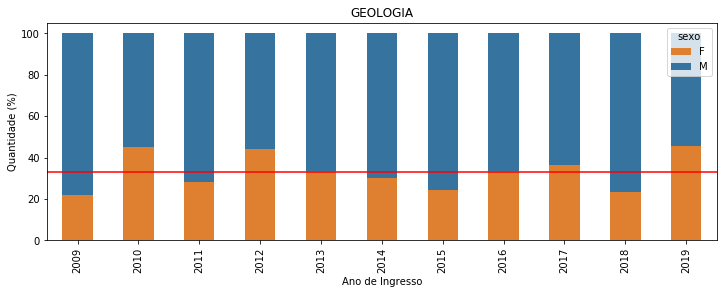

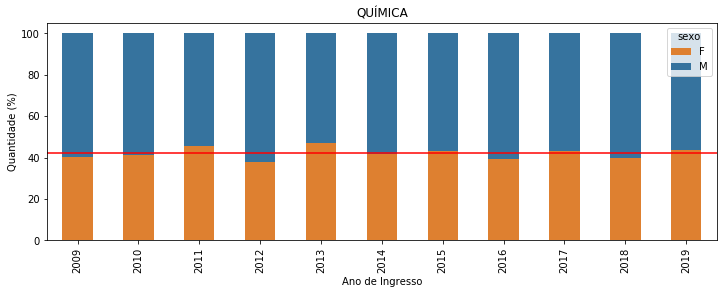

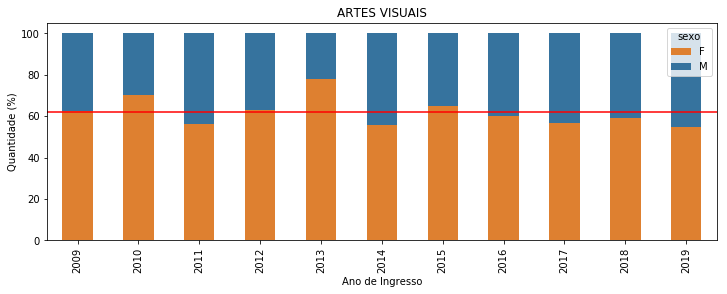

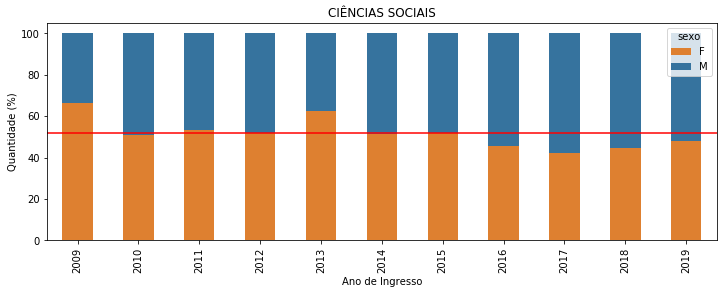

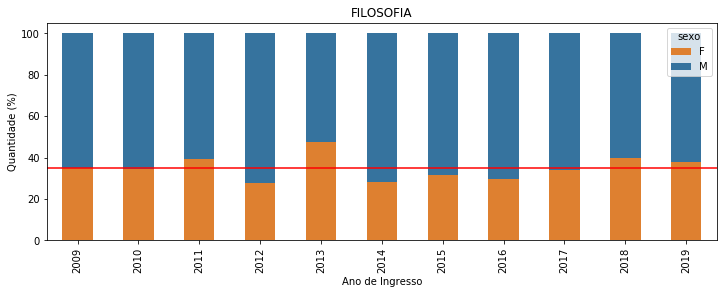

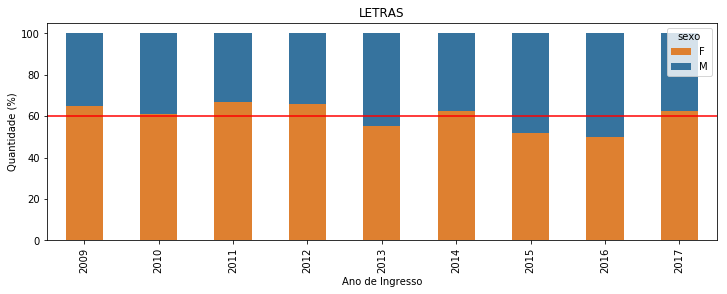

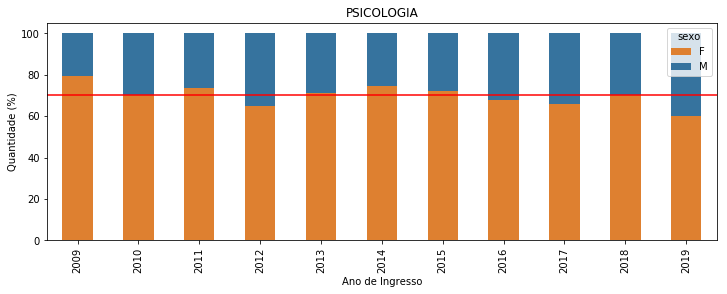

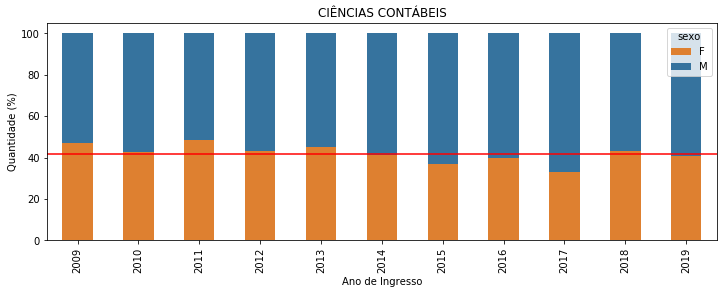

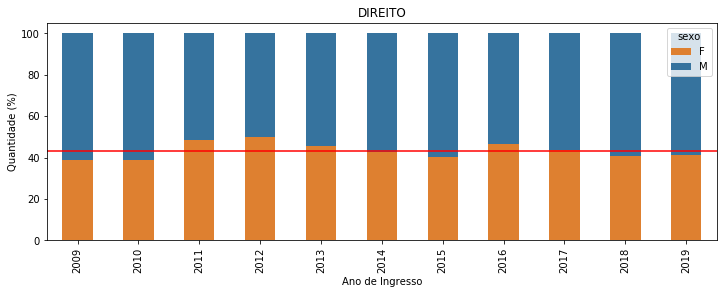

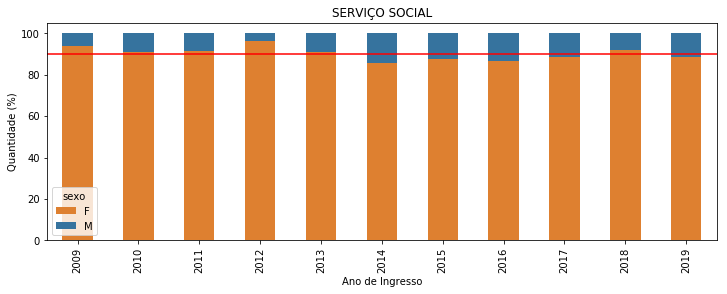

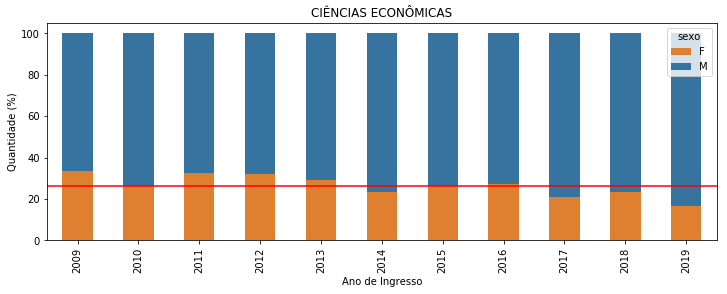

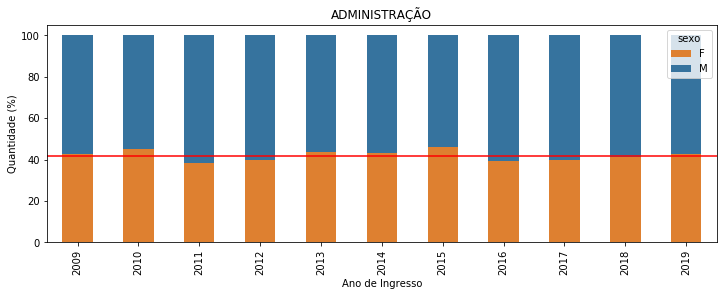

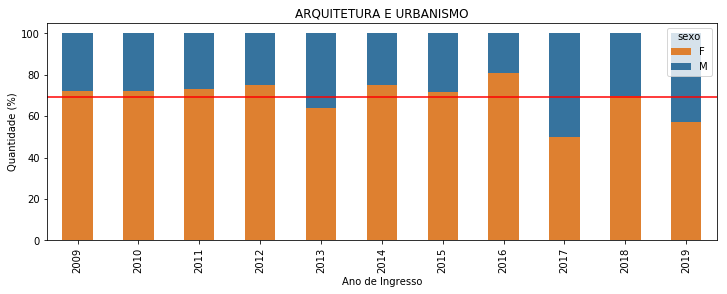

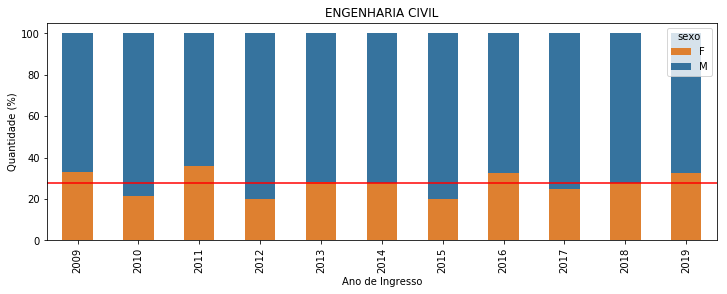

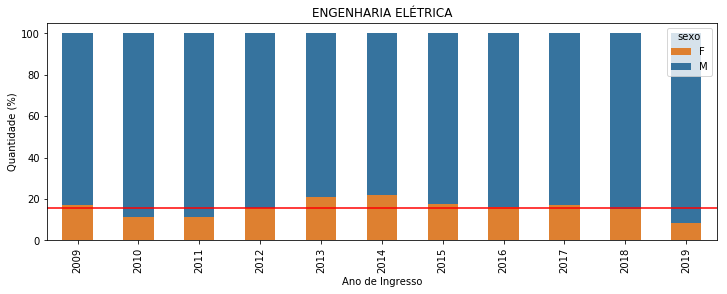

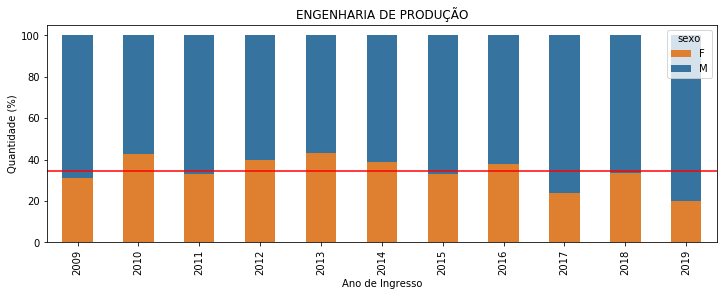

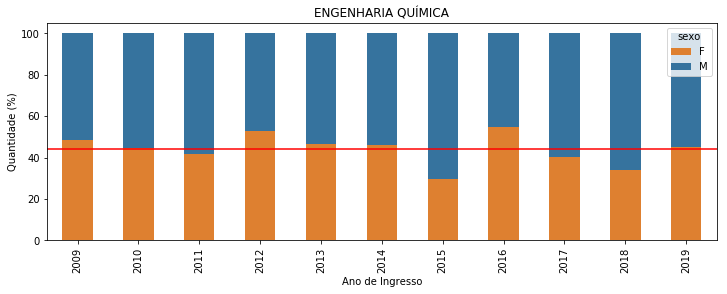

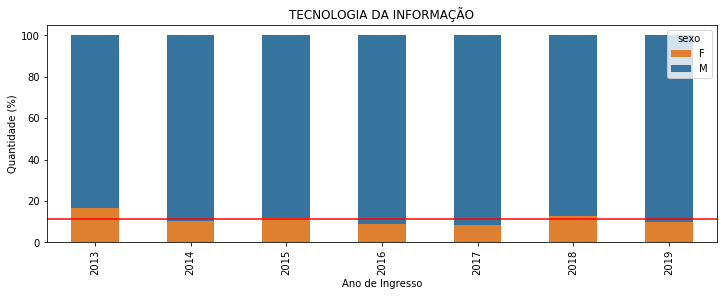

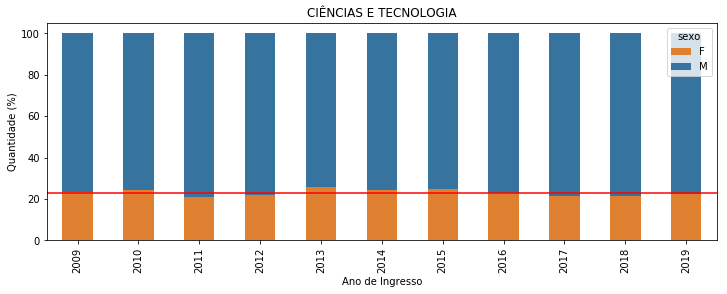

In [0]:
# Gráfico de cada curso
for i in range(31): 
  c = grad.loc[grad["nome_curso"] == cursos[i]]
  c_plot = c.groupby(["sexo", "ano_ingresso"]).size().reset_index().pivot(columns="sexo", index="ano_ingresso", values=0)
  c_plot["T"] = c_plot["M"] + c_plot["F"]
  c_plot["F"] = c_plot["F"] / c_plot["T"] * 100
  c_plot["M"] = c_plot["M"] / c_plot["T"] * 100
  c_plot.pop("T")
  ax = c_plot.plot.bar(stacked=True, figsize=(12,4), color=[(0.87, 0.5, 0.19, 1),(0.21,0.45,0.62,1)])
  ax.set_xlabel("Ano de Ingresso")
  ax.set_ylabel("Quantidade (%)")
  ax.set_title(cursos[i])
  ax.axhline(c_plot["F"].mean(), color="red")

plt.show()

No que se refere aos cursos em específico, não é visível melhora em relação à igualdade. No geral, os cursos pemancem com a mesma relação entre os sexos ao longo dos anos.

Em relação à proporção entre os sexos, podemos dividir os cursos em três categorias: aqueles com predominância masculina, com predominância feminina e com certa igualdade. Para isso, consideramos 40%-60% de presença feminina como igualdade, e menos ou mais que isso é interpretado como alguma dominância.

Com predominância masculina, existe 11 cursos. Com predominância feminina,  são 9 cursos. Existe equilíbrio entre os sexos em 11 cursos.

**2.  Análise da diferença de raça nos cursos de graduação da UFRN**

---



Agora iremos analisar, ainda nos cursos de graduação, a diferença de raças.

Iremos remover do nosso dataset as linhas onde os valores para a coluna "raca" foram inseridos como "Não Informado". Logo após iremos gerar um gráfico geral para todos os cursos de graduação da UFRN.

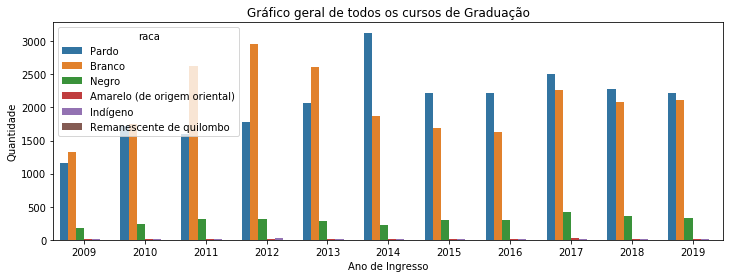

In [14]:
grad = graduacao

# Remove as pessoas que não informaram a raça
grad = grad[grad.raca != "Não Informado"]

# Paleta de cores fixas
palette = {"Pardo":"C0", "Branco":"C1", "Negro":"C2", "Amarelo (de origem oriental)":"C3", "Indígeno":"C4", "Remanescente de quilombo":"C5"}

# Gráfico geral
plt.figure(figsize=(12,4))
plt.title("Gráfico geral de todos os cursos de Graduação")
ax = sns.countplot(x="ano_ingresso", hue="raca", data=grad, palette=palette)
ax.set_xlabel("Ano de Ingresso")
ax.set_ylabel("Quantidade")

plt.show()

Agora, iremos gerar um gráfico para cada curso de gradução. Ao todo serão 31 gráficos.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


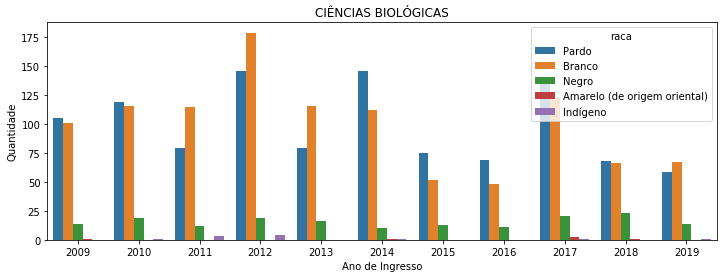

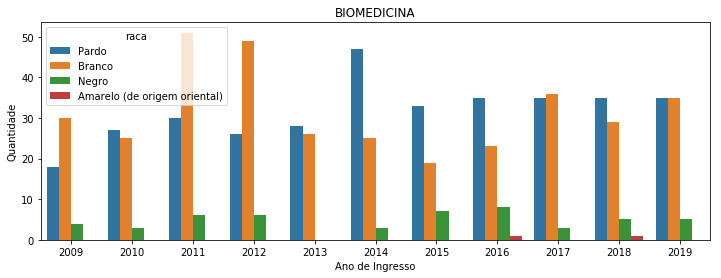

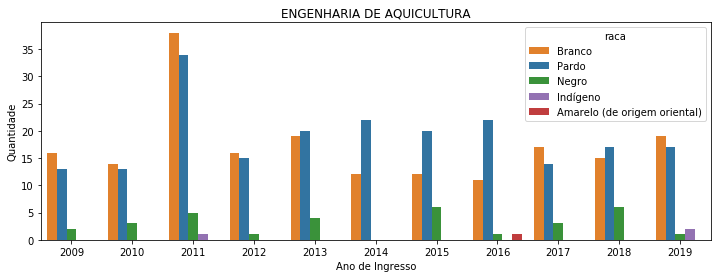

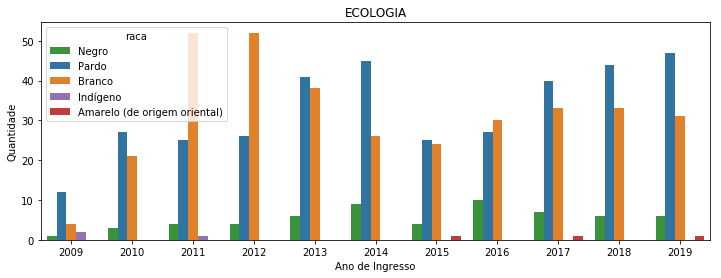

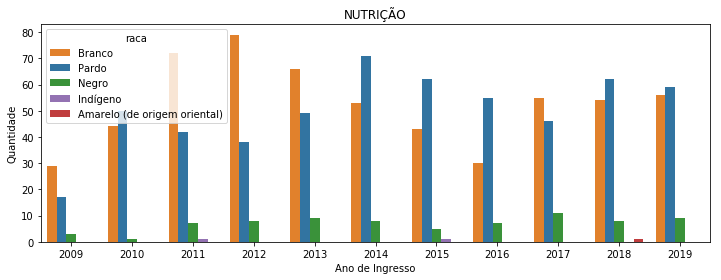

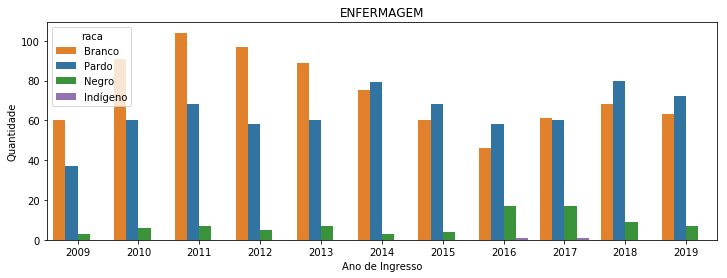

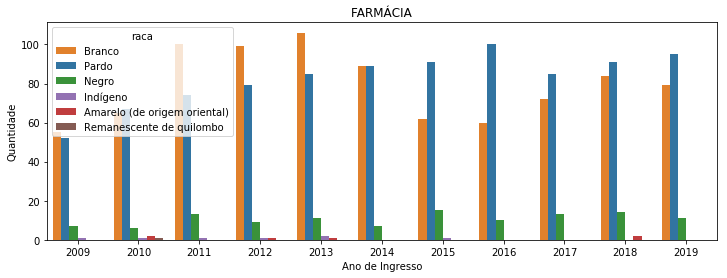

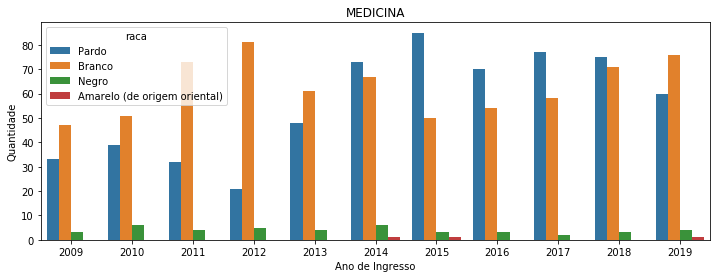

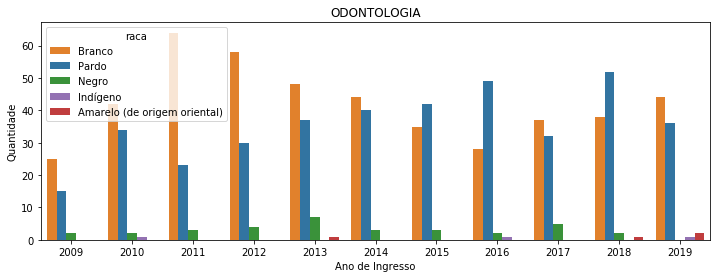

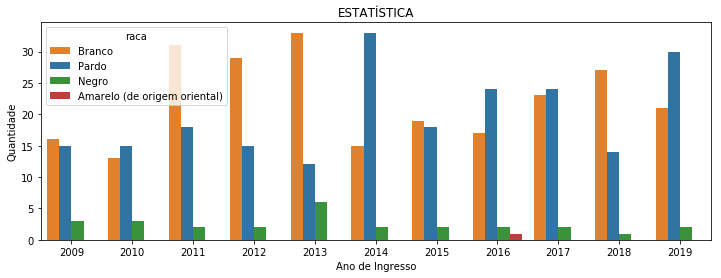

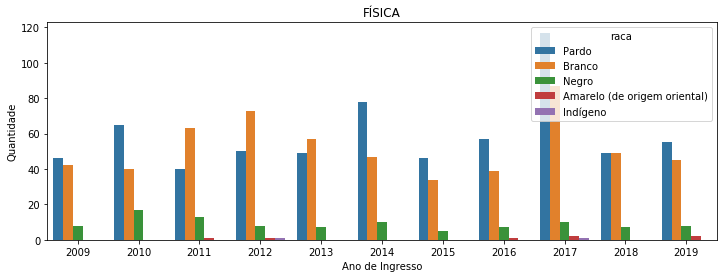

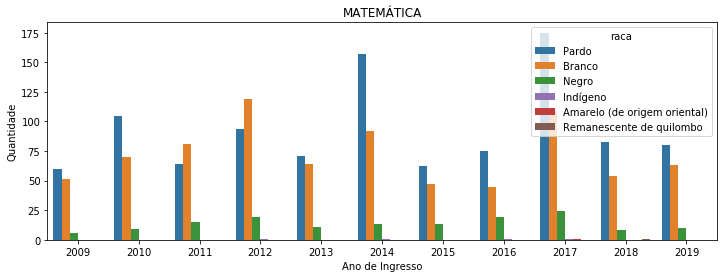

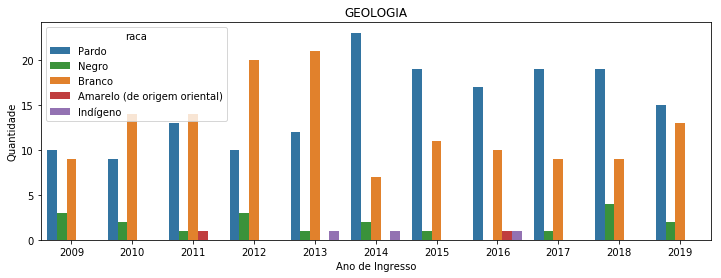

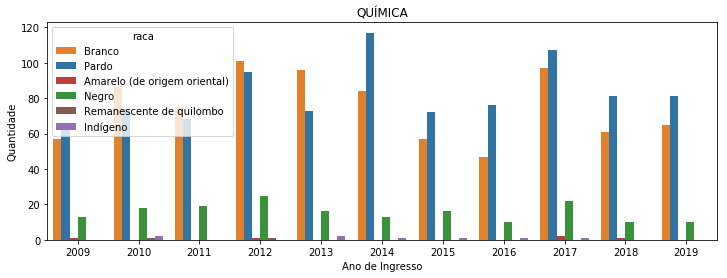

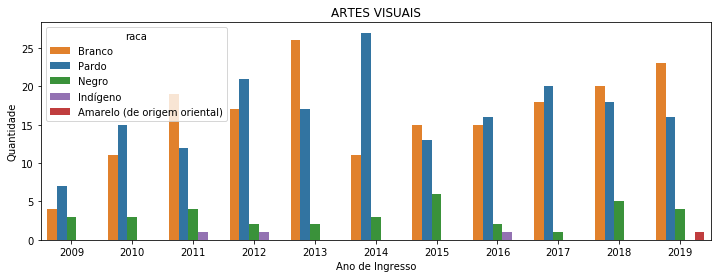

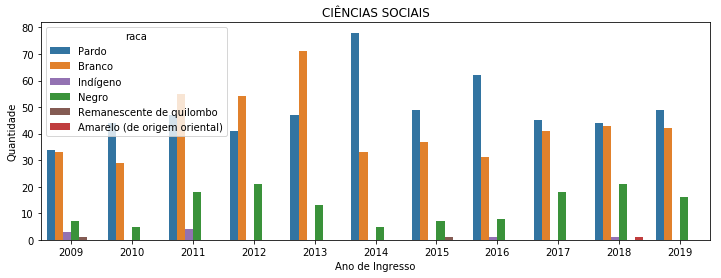

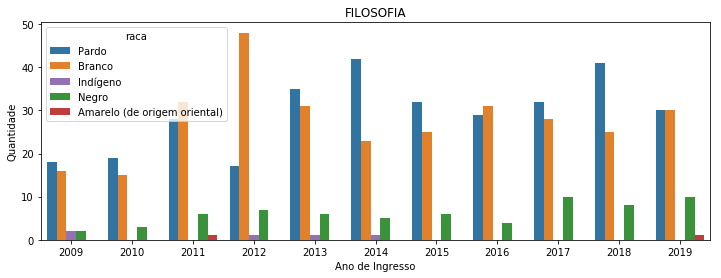

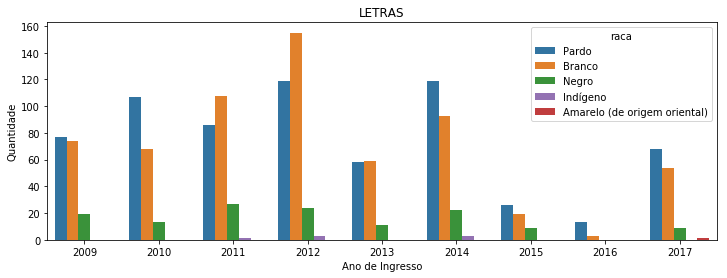

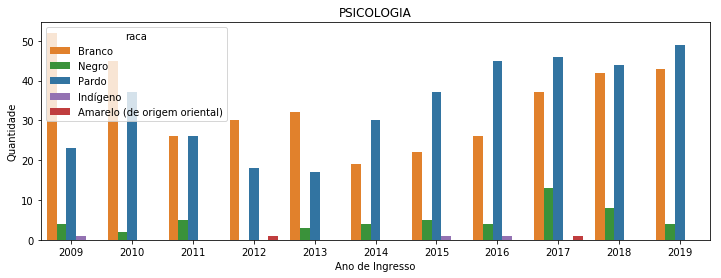

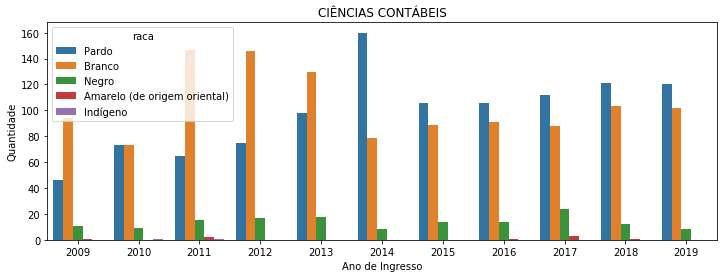

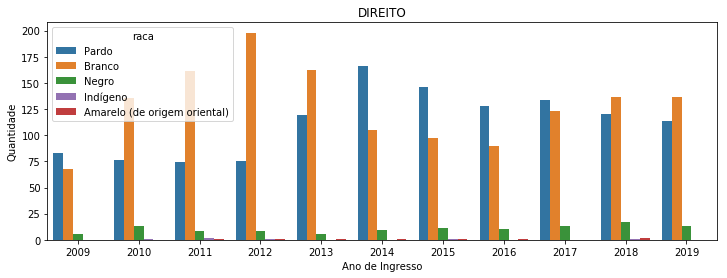

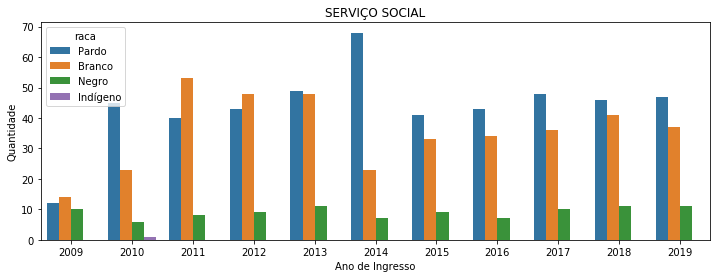

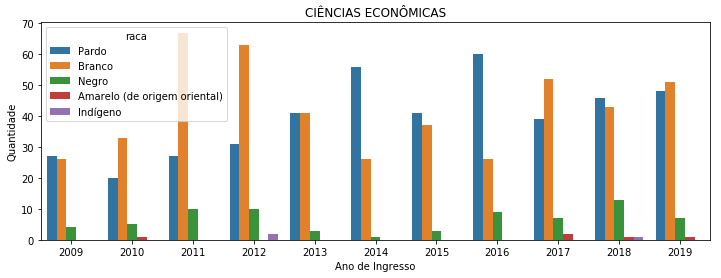

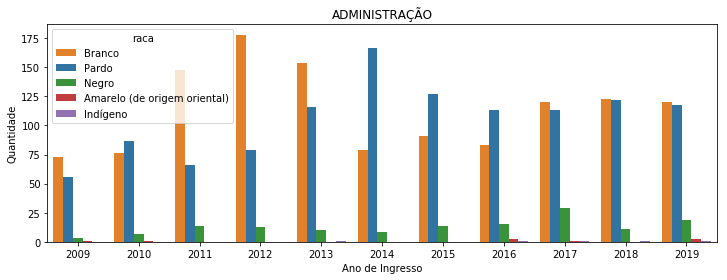

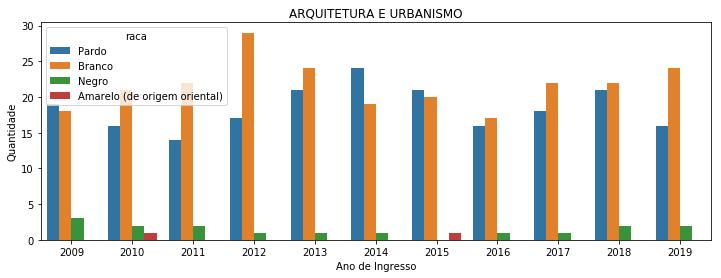

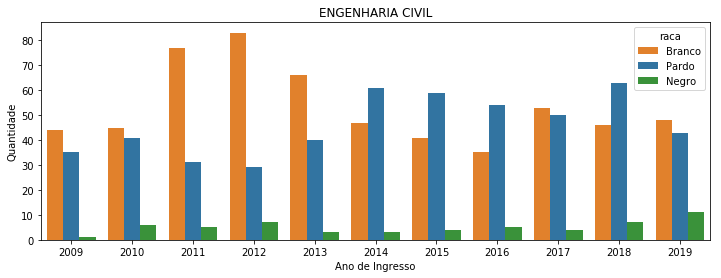

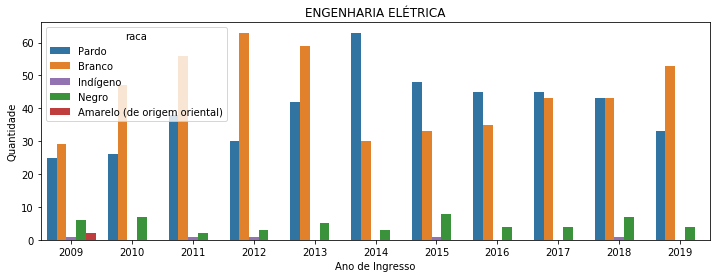

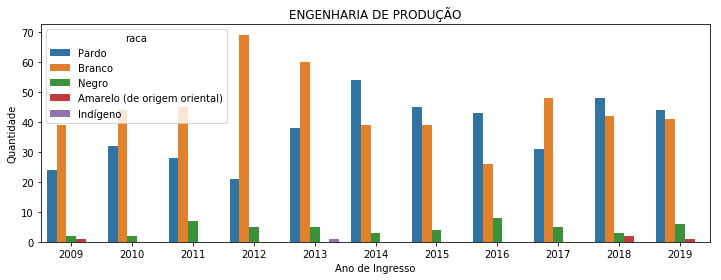

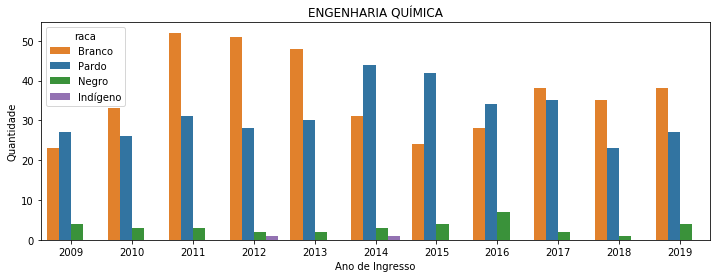

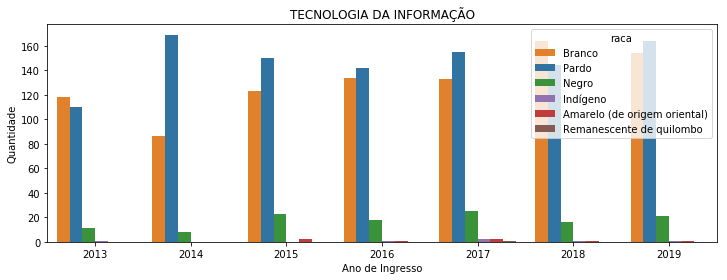

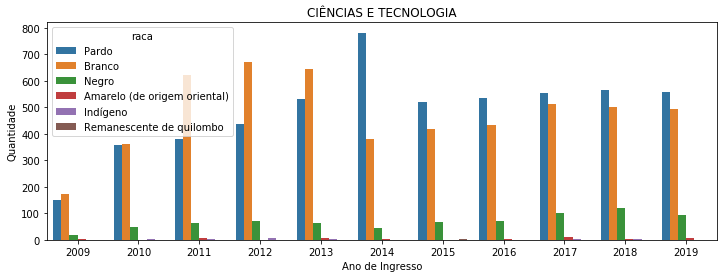

In [13]:
# Gráfico de cada curso
for i in range(31):
  c = grad.loc[grad["nome_curso"] == cursos[i]]
  plt.figure(figsize=(12,4))
  plt.title(cursos[i])
  plt.xlabel("Ano de Ingresso")
  plt.ylabel("Quantidade")
  ax = sns.countplot(x="ano_ingresso", hue="raca", data=c, palette=palette)
  ax.set_xlabel("Ano de Ingresso")
  ax.set_ylabel("Quantidade")

plt.show()

As minorias são extremamente desfavorecidas na UFRN. Brancos e pardos constituem quase todo o corpo discente. E, assim como no caso dos sexos, não existe indícios de que vai melhorar. Dentre as minorias, a melhor representada são os negros. Amarelos, indígenas e remanescentes de quilombo muitas vezes nem aparecem dentre os ingressantes.

# **Pós-Graduação**

**1.  Análise da diferença de gênero nos cursos de pós-graduação da UFRN**

---

Após a análise dos cursos de graduação, iremos analisar a diferença de gênero nos cursos de pós-graduação. Continuaremos utilizando as colunas "sexo" e "ano_ingresso" como base para a nossa análise e o gráfico de barras para demonstrar os resultados obtidos. No entanto, nossa finalidade nesse ponto é analisar os dados apenas dos cursos de pós-graduação da UFRN , logo, iremos filtrar do nosso dataset apenas as linhas onde a coluna **"nivel_ensino**" for equivalente a **"Mestrado"** ou **"Doutorado"**.

Iremos realizar os mesmos procedimentos que utilizamos no caso da graduação. No entanto, nesse caso a coluna "sexo" não possui valores igual a "N", logo,  não há a necessidade de realizar uma filtragem como feita no caso dos datasets da graduação. Mas ainda é preciso criar uma lista com todos os cursos de pós-graduação que citamos na introdução. Essa lista irá nos auxiliar na hora de percorrer o nosso dataset e filtrar apenas os dados equivalentes aos cursos escolhidos. Para essa filtragem, utilizaremos novamente a função **isin()**.




In [0]:
pos_grad = discentes[(discentes["nivel_ensino"] == "MESTRADO") | (discentes["nivel_ensino"] == "DOUTORADO")]

# Lista com os programas de pós-graduação que queremos
espec = ["MESTRADO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO", "DOUTORADO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO",
        "MESTRADO EM SISTEMAS E COMPUTAÇÃO", "DOUTORADO EM CIÊNCIA DA COMPUTAÇÃO",
        "MESTRADO PROFISSIONAL EM ENGENHARIA DE SOFTWARE",
        "MESTRADO PROFISSIONAL EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS",
        "MESTRADO EM BIOINFORMÁTICA", "DOUTORADO EM BIOINFORMÁTICA"]
# Filtrando apenas os cursos presentes na lista espec
pos_grad = pos_grad.loc[pos_grad["nome_curso"].isin(espec)]

# Exportando CSV
pos_grad.to_csv(r'pos_grad.csv')

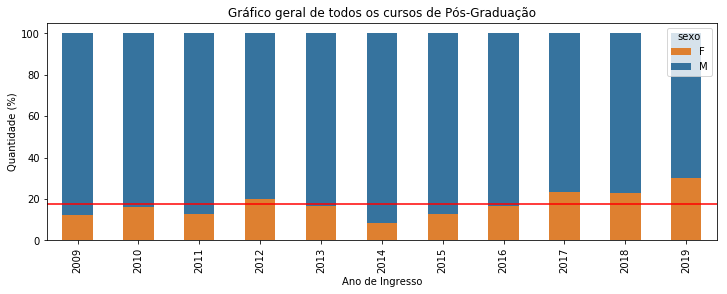

In [9]:
pos = pos_grad

# Paleta de cores fixas
palette = {"M":"C0", "F":"C1"}

# Gráfico geral por porcentagem
pos_plot = pos_grad.groupby(["sexo", "ano_ingresso"]).size().reset_index().pivot(columns="sexo", index="ano_ingresso", values=0)
pos_plot["T"] = pos_plot["M"] + pos_plot["F"]
pos_plot["F"] = pos_plot["F"] / pos_plot["T"] * 100
pos_plot["M"] = pos_plot["M"] / pos_plot["T"] * 100
pos_plot.pop("T")
ax = pos_plot.plot.bar(stacked=True, figsize=(12,4), color=[(0.87, 0.5, 0.19, 1),(0.21,0.45,0.62,1)])
ax.set_xlabel("Ano de Ingresso")
ax.set_ylabel("Quantidade (%)")
ax.set_title("Gráfico geral de todos os cursos de Pós-Graduação")
ax.axhline(pos_plot["F"].mean(), color="red")

plt.show()

O gráfico acima nos dá uma visão geral da diferença de gênero em todos os cursos de Pós-Graduação da UFRN. A linha vermelha no gráfico acima nos mostra a média de pessoas do sexo feminino ingressantes durante todos os anos. A diferença da quantidade de ingressantes homens é discrepante. Podemos perceber que no aspecto geral dos cursos de pós-graduação, diferente do caso da gradução, não existe sequer uma leve igualdade entre os sexos, e sim uma grande desvantagem para as mulheres. Enquanto que na graduação, a média de ingressantes mulheres era de pouco mais de 40%, na pós-graduação essa média sequer chega a 20%. Em 2014, 10% dos ingressantes eram mulheres, sendo esse o menor número ao longo dos anos até que, em 2019, tivemos uma quantidade maior do que a média, sendo o ano em que mais houve ingressantes mulheres. 

Agora, iremos gerar um gráfico para cada curso de Pós-Graduação. Ao todo serão 8 gráficos.

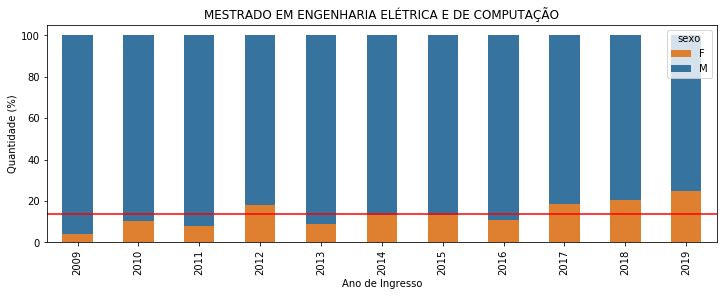

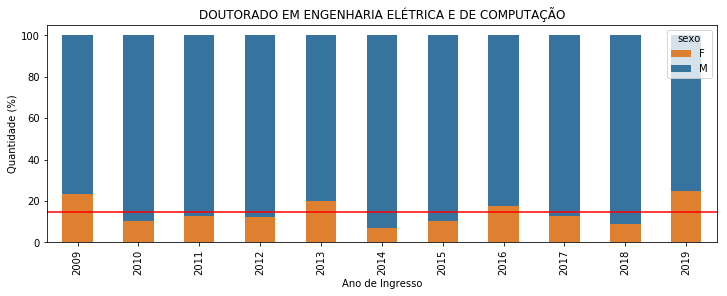

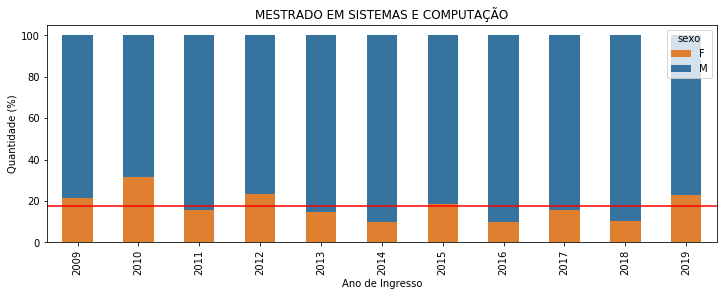

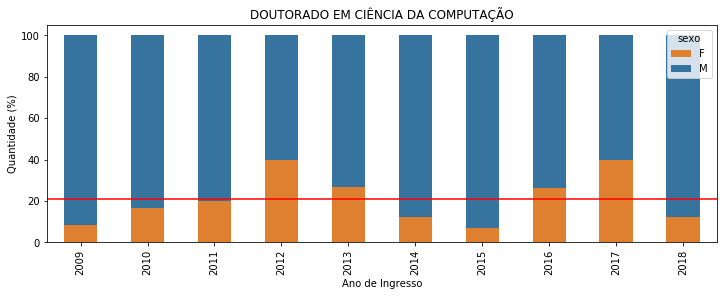

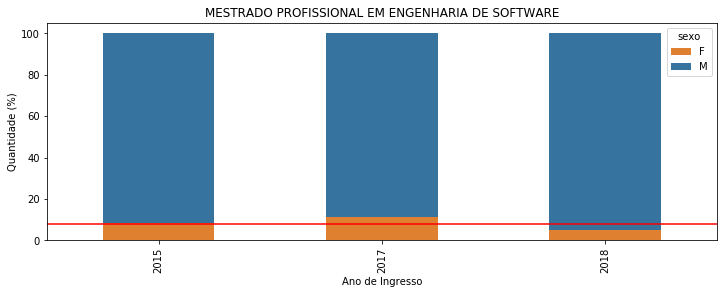

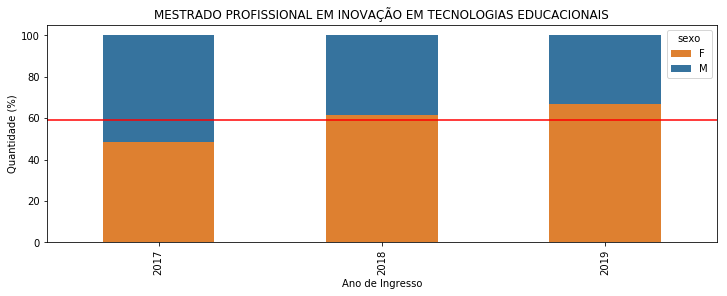

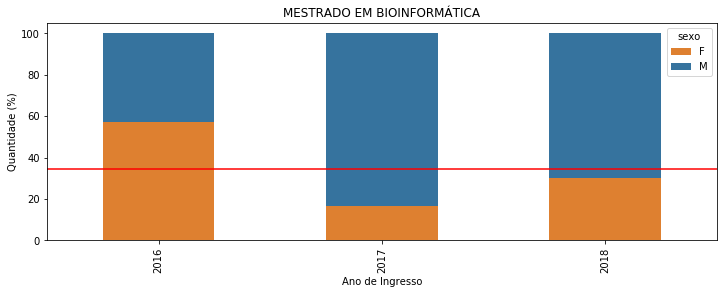

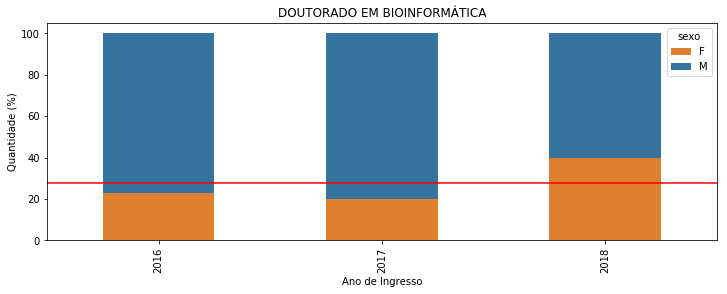

In [11]:

# Gráfico de cada curso
for i in range(8):
  c = pos_grad.loc[pos_grad["nome_curso"] == espec[i]]
  c_plot = c.groupby(["sexo", "ano_ingresso"]).size().reset_index().pivot(columns="sexo", index="ano_ingresso", values=0)
  c_plot["T"] = c_plot["M"] + c_plot["F"]
  c_plot["F"] = c_plot["F"] / c_plot["T"] * 100
  c_plot["M"] = c_plot["M"] / c_plot["T"] * 100
  c_plot.pop("T")
  c_plot = c_plot.dropna()
  ax = c_plot.plot.bar(stacked=True, figsize=(12,4), color=[(0.87, 0.5, 0.19, 1),(0.21,0.45,0.62,1)])
  ax.set_xlabel("Ano de Ingresso")
  ax.set_ylabel("Quantidade (%)")
  ax.set_title(espec[i])
  ax.axhline(c_plot["F"].mean(), color="red")

plt.show()

Nos casos individuais, é possível perceber que a pós-graduação em "Mestrado Profissional em Inovação em Tecnologias Educacionais" é a que possui a maior média de ingressantes mulheres, sendo essa pouco menos de 60%. No "Mestrado em Bioinformática" temos uma média também vantajosa, onde quase 40% são ingressantes mulheres.  Enquanto que nos outros programas de pós-graduação a média varia entre aproximadamente 20%.

**2.  Análise da diferença de raça nos cursos de pós-graduação da UFRN**

---

Agora iremos analisar, ainda nos cursos de pós-graduação, a diferença de raças. 

Iremos remover do nosso dataset as linhas onde os valores para a coluna "raca" foram inseridos como "Não Informado". Logo após iremos gerar um gráfico geral para todos os cursos de pós-graduação da UFRN.

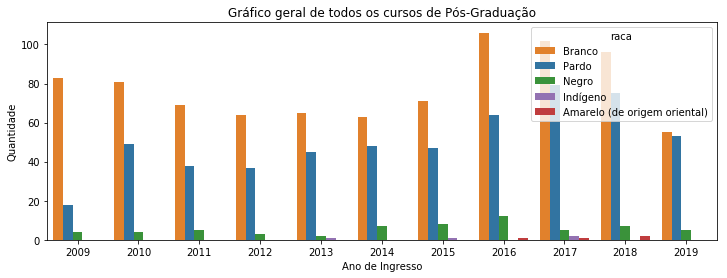

In [16]:
pos = pos_grad

# Remove as pessoas que não informaram a raça
pos = pos[pos.raca != "Não Informado"]

# Paleta de cores fixas
palette = {"Pardo":"C0", "Branco":"C1", "Negro":"C2", "Amarelo (de origem oriental)":"C3", "Indígeno":"C4"}

# Gráfico geral
plt.figure(figsize=(12,4))
plt.title("Gráfico geral de todos os cursos de Pós-Graduação")
ax = sns.countplot(x="ano_ingresso", hue="raca", data=pos, palette=palette)
ax.set_xlabel("Ano de Ingresso")
ax.set_ylabel("Quantidade")

plt.show()

No gráfico geral acima é possível perceber que na pós-graduação as minorias são bem menos representadas. A quantidade de ingressantes é em sua grande maioria brancos e pardos, não havendo tanta diferença entre os anos onde essas duas raças se mantém liderando. Os negros ao longo dos anos permanecem ingressando em pouca quantidade, no entanto, os indígenas e amarelos (de origem oriental) sequer chegam a ingressar em alguns anos.

Agora, iremos gerar um gráfico para cada curso de Pós-Graduação. Ao todo serão 8 gráficos.

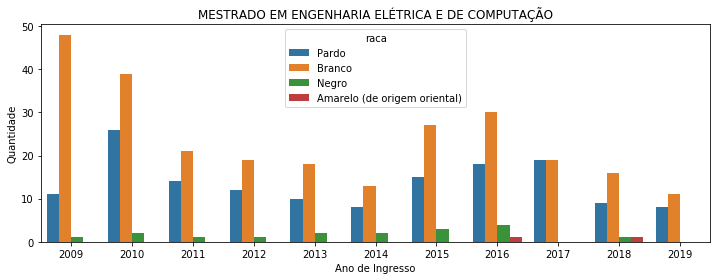

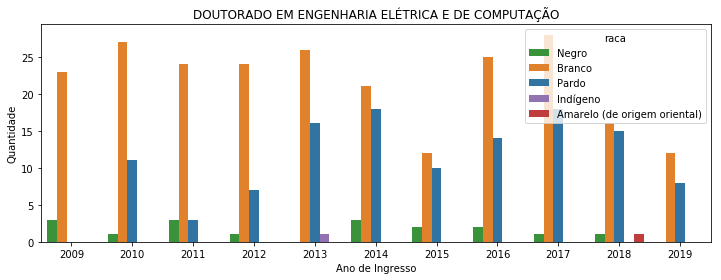

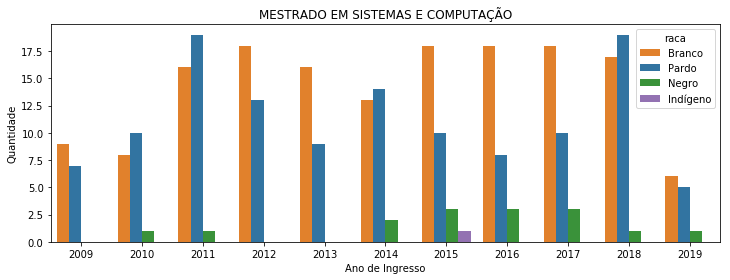

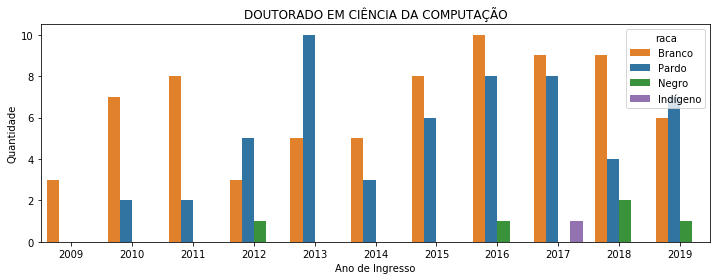

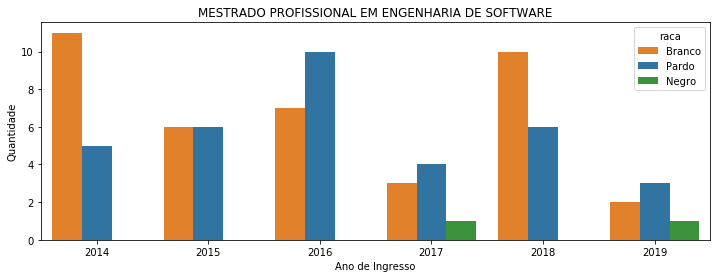

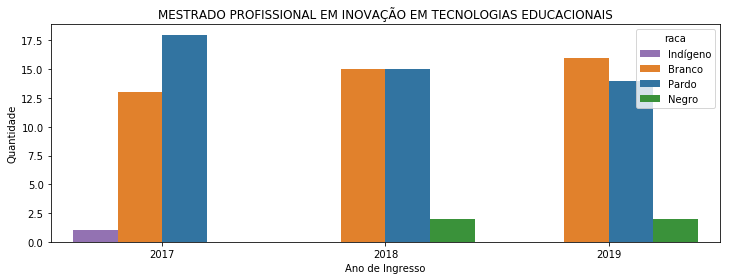

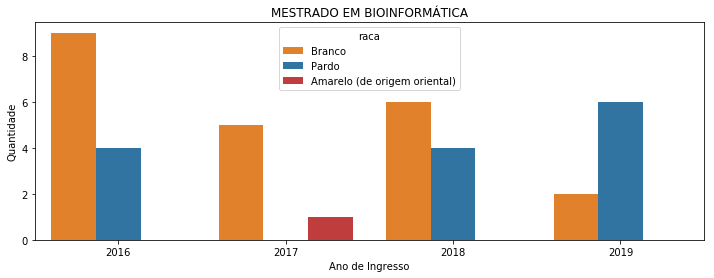

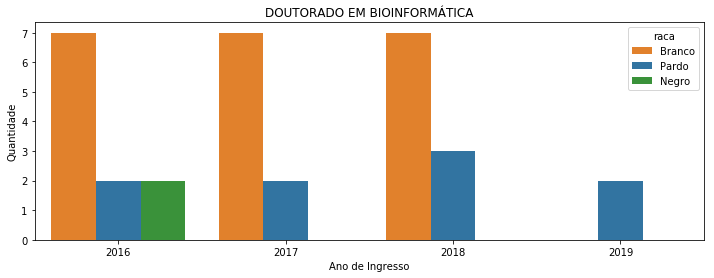

In [17]:
# Gráfico de cada curso
for i in range(8):
  c = pos.loc[pos["nome_curso"] == espec[i]]
  plt.figure(figsize=(12,4))
  plt.title(espec[i])
  plt.xlabel("Ano de Ingresso")
  plt.ylabel("Quantidade")
  ax = sns.countplot(x="ano_ingresso", hue="raca", data=c, palette=palette)
  ax.set_xlabel("Ano de Ingresso")
  ax.set_ylabel("Quantidade")

plt.show()

Nos casos individuais, é possível perceber que a quantidade de ingressantes brancos ainda continua predominante, no entanto, em alguns casos temos uma igualdade de ingressantes brancos e pardos ou uma maior quantidade de ingressantes pardos, como é o caso do "Mestrado Profissional em Inovação em Tecnologias Educacionais" onde no ano de 2017 a quantidade de pardos ingressantes foi maior do que a de brancos, e em 2018 a quantidade de brancos e pardos foi equivalente.

Quanto aos indígenas e negros, podemos ver que em todos os cursos de pós-graduação a quantidade de  ingressantes permanece baixa e em alguns anos, inexistentes.